# Pymaceuticals Inc.
---

### Analysis
- Capomulin and Ramicane had the lowest mean and median tumor volumnes among the 8 drug regimens tested.
- The Placebo and Naftisol had the highest tumor volumes tested among the 8 regimens.
- The correalation between mouse weight and the average tumor volume is 0.95

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"],how="left")

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [44]:
# Checking the number of mice.
Mice = len(combined_df["Mouse ID"].unique())
Mice

249

In [50]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_df[combined_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]

#checking
duplicate_rows
#looks like the id g989 shows up multiple times

result_array = duplicate_rows["Mouse ID"].unique()
result_array

array(['g989'], dtype=object)

In [52]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_rows.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicates_df = combined_df[combined_df["Mouse ID"] != 'g989']
no_duplicates_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice in the clean DataFrame.
New_Mice = len(no_duplicates_df["Mouse ID"].unique())
New_Mice

248

## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
no_duplicates_df.describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen = no_duplicates_df["Drug Regimen"].unique()
mean_tumor_volume = no_duplicates_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = no_duplicates_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_variance = no_duplicates_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_std = no_duplicates_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_sem = no_duplicates_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

drug_regimen_df = pd.DataFrame(
    {"Mean Tumor Volume":mean_tumor_volume,
    "Median Tumor Volume":median_tumor_volume,
    "Tumor Volume Variance":tumor_volume_variance,
    "Tumor Volume Std. Dev.":tumor_volume_std,
    "Tumor Volume Std. Err.":tumor_volume_sem })


drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
no_duplicates_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

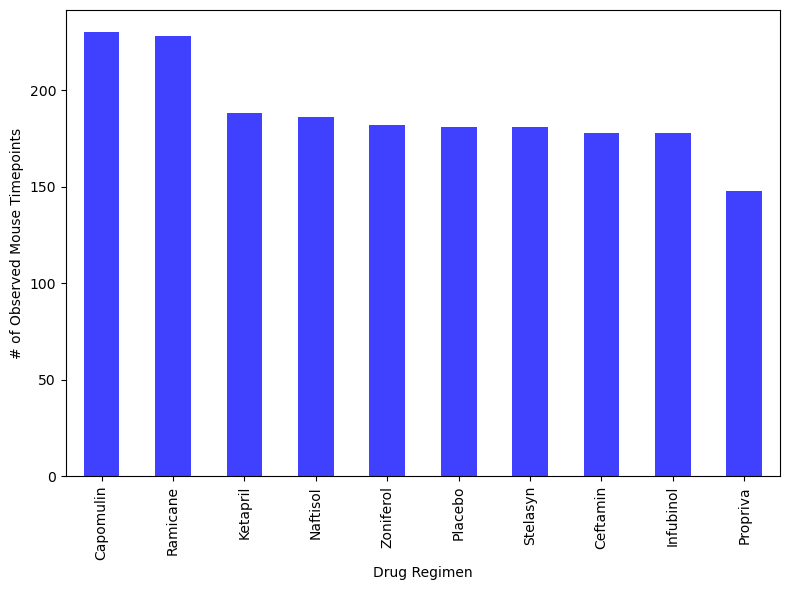

In [106]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Set x axis and tick locations

# Group by 'Drug Regimen' and count the number of rows
regimen = no_duplicates_df.groupby("Drug Regimen").size()

regimen_counts = regimen.sort_values(ascending=False)

#Plot on the bar chart
regimen_counts.plot(kind='bar',figsize=(8,6), color='b', alpha=.75)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

#Set x-axis ticks and labels
plt.xticks(rotation = "vertical")
plt.xticks(range(len(regimen_counts)), regimen_counts.index)

plt.tight_layout()
plt.show()


In [108]:
regimen_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
dtype: int64

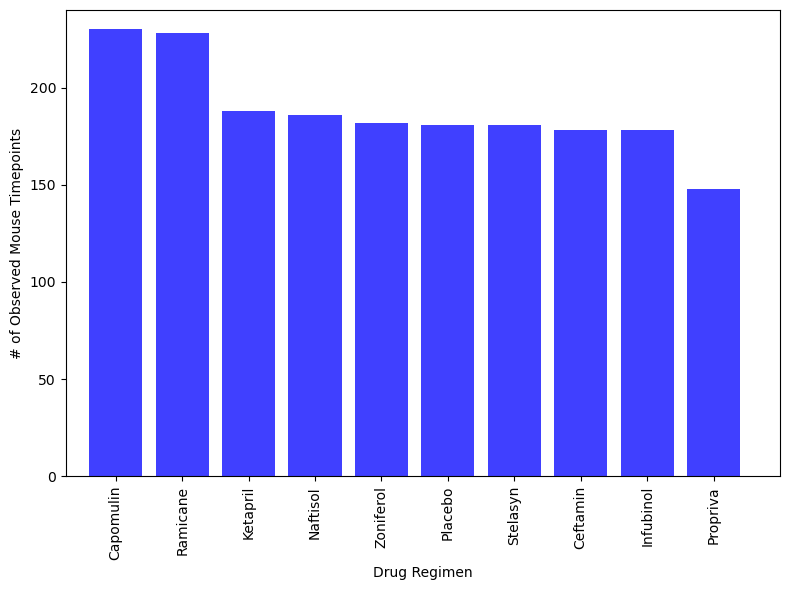

In [113]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import numpy as np

x_axis = np.arange(len(regimen_counts))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,6))
plt.bar(x_axis, regimen_counts, color='b', alpha=0.75, align="center")
plt.xticks(tick_locations,regimen_counts.index, rotation="vertical")

plt.xlim(-.75, len(x_axis))
plt.ylim(0, max(regimen_counts)+10)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
           
plt.tight_layout()
plt.show()

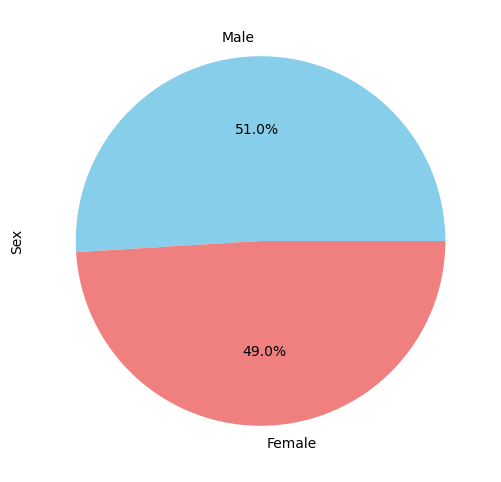

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = no_duplicates_df.groupby("Sex").size()
mice_sex_counts = mice_sex.sort_values(ascending=False)

#Plot on the bar chart
mice_sex_counts.plot(kind='pie',figsize=(8,6), autopct='%1.1f%%', colors=['skyblue','lightcoral'])

plt.xlabel("")
plt.ylabel("Sex")

plt.show()


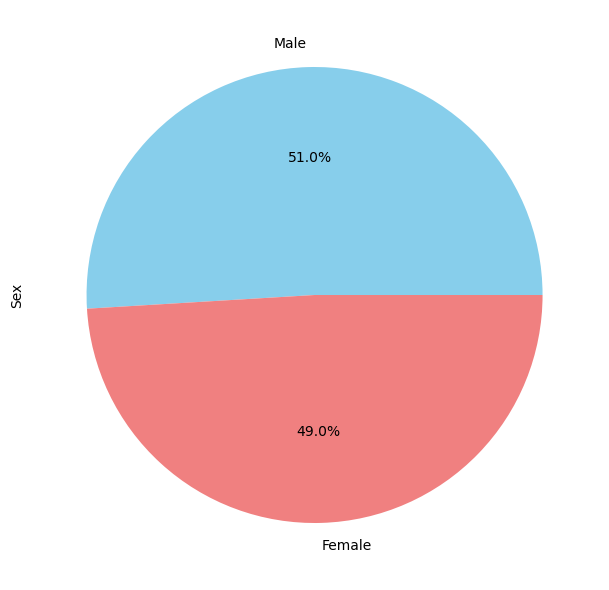

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = np.arange(len(mice_sex_counts))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,6))
plt.pie(mice_sex_counts, labels=mice_sex_counts.index, colors=['skyblue','lightcoral'], autopct ='%1.1f%%')

plt.xlabel("")
plt.ylabel("Sex")
           
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [146]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = four_drugs_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoints

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(max_timepoints, no_duplicates_df, on=["Mouse ID","Timepoint"],how="left")
max_timepoint_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [173]:
# Put treatments into a list for for loop (and later for plot labels)
target_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in target_drugs:
    drug_data = max_timepoint_df[max_timepoint_df["Drug Regimen"] ==drug]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = drug_data["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    #potential outliers
    outliers = (tumor_vol < lower_bound) | (tumor_vol >upper_bound)

    # Print or store information about potential outliers
    if outliers.any():
        print(f"Potential outliers for {drug}: {tumor_vol[outliers].values}")

# Display or use tumor_vol_data for plotting
print(tumor_vol_data)

Potential outliers for Infubinol: [36.3213458]
[9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64, 3     38.407618
4     43.047543
5     38.810366
7     32.978522
16    38.342008
17    33.397653
19    37.311236
21    40.659006
27    29.128472
29    33.562402
30    36.374510
37    31.560470
38    36.134852
40    22.050126
50    30.564625
54    31.095335
62    45.220869
63    36.561652
66    37.225650
67    43.419381
71    30.276232
77    40.667713
87    43.166373
94    44.183451
98    30.638696
Name: Tumor Volume (mm3), dtype: float64, 0     67.973419
1     65.525743
6     57.031862
8     66.083066
14  

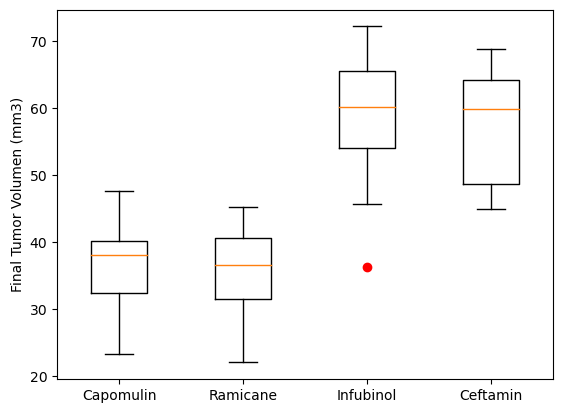

In [165]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#boxplot
plt.boxplot(tumor_vol_data, labels=target_drugs, sym='r')

#adding labels
plt.ylabel("Final Tumor Volumen (mm3)")

# Show the plot
plt.show()

## Line and Scatter Plots

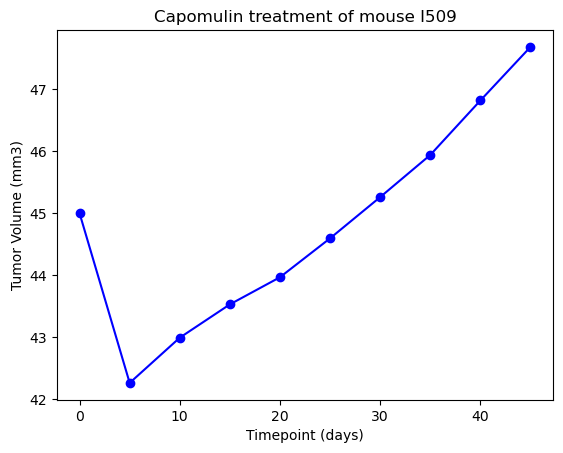

In [189]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Specify the mouse ID and the drug regimen (Capomulin)

mouse_id_capomulin = "i557"
drug_regimen_capomulin = "Capomulin"

# Filter the data for the specified mouse and drug regimen
single_mouse_data = no_duplicates_df[(no_duplicates_df['Mouse ID'] == mouse_id_capomulin) & (no_duplicates_df['Drug Regimen'] == drug_regimen_capomulin)]

single_mouse_data
#Looks good

# Create a line plot of tumor volume vs. time point
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I557")

# Show the plot
plt.show()

#please note, there was no data for Mouse ID I509 when I ran it, so I did another one.

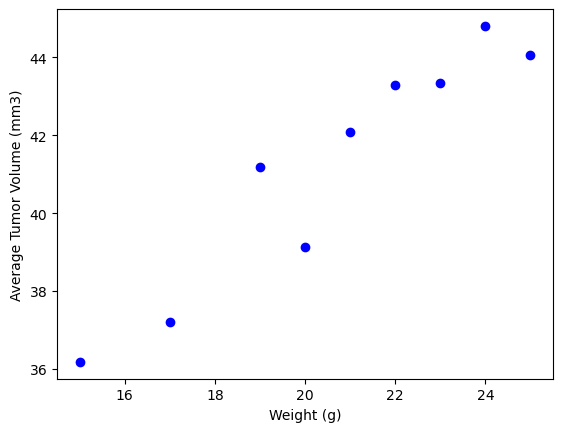

In [241]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

drug_regimen_capomulin = "Capomulin"

# Filter the data for the specific drug regimen
capomulin_data = no_duplicates_df[no_duplicates_df['Drug Regimen'] == drug_regimen_capomulin]

capomulin_data

capomulin_avg_tumor_data = capomulin_data.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

capomulin_avg_tumor_data
                                                                             
#Looks good

# Create a line plot of tumor volume vs. time point
plt.scatter(capomulin_avg_tumor_data["Weight (g)"], capomulin_avg_tumor_data['Tumor Volume (mm3)'], marker='o', color='b')

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

## Correlation and Regression

The correalation between mouse weight and the average tumor volume is 0.95


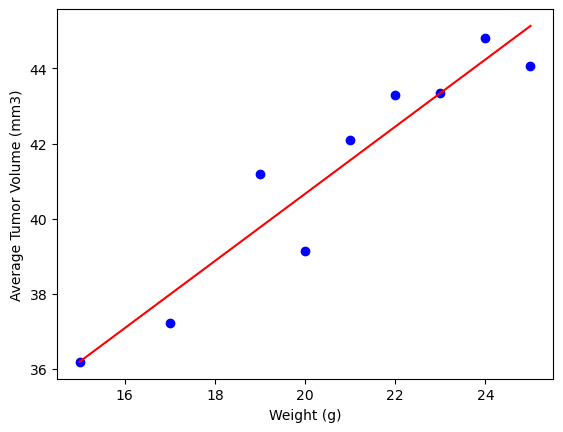

In [243]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

# Extracting data for the calculation
weight_data = capomulin_avg_tumor_data["Weight (g)"]
tumor_volume_data = capomulin_avg_tumor_data['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(weight_data, tumor_volume_data)

formatted_correlation = "{:.2f}".format(correlation_coefficient)

print(f"The correalation between mouse weight and the average tumor volume is {formatted_correlation}")


# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weight_data, tumor_volume_data)

# Create a line equation based on the regression model
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.scatter(weight_data, tumor_volume_data, marker='o', color='b')

# Plot the regression line
regression_line = slope * weight_data + intercept
plt.plot(weight_data, regression_line, color='r')

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()